In [1]:
import pandas as pd
import nltk

In [2]:
df = pd.read_csv("C:\\Users\\hlmq\\OneDrive - Chevron\\Desktop\\Projects\\GSIC Threat Prediction\\Data\\LABELED_1.11.23_RandomSet2Predictions_1524.csv")

In [3]:
df.head()

,Caption,Alert_Type,Relevant,Bryce
0,protest scheduled for # on plaza de la constit...,Alert,Relevant,False
1,protest blocks road at intersection of laurean...,Alert,Relevant,True
2,demonstration crowds area in ufa republic of b...,Alert,Relevant,True
3,protesters face off against police in front of...,Alert,Relevant,True
4,protest scheduled for march # at # in # cities...,Alert,Relevant,True


In [4]:
df['Bryce'].value_counts()

False    1223
True      301
Name: Bryce, dtype: int64

In [5]:
df['Caption'][10]

'four police officers seriously injured and one arrested during protest at istana negara in jakarta indonesia'

## Tokenize Captions

In [9]:
# Tokenize (also removes punctuation and makes everything lowercase)
def tokenize(page):
    tokens = nltk.word_tokenize(page)
    return tokens

In [10]:
df['caption_tokens'] = df['Caption'].apply(tokenize)

## Needle in a haystack

In [12]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import string
import nltk
import re

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Topic Modeling
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [13]:
# Helper functions
def print_topics(model, count_vectorizer, n_top_words) -> str:
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [16]:
# TF-IDF, Cosine Similarity, Principal Components

# Term Frequency / Inverse Document Frequency creation
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['Caption'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()

df_TFIDF = pd.DataFrame(denselist, columns=feature_names)

# Compute cosine similarity between rows
simRes = cosine_similarity(df_TFIDF)

# Principal Components to reduce dimensions to 2
dr = PCA(n_components=2)
pcaDF = pd.DataFrame(dr.fit_transform(simRes))


dense_df = pd.DataFrame(dense,columns = feature_names)

C:\Users\hlmq\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'KMeans Cluster of Cosine Similarity on Observations')

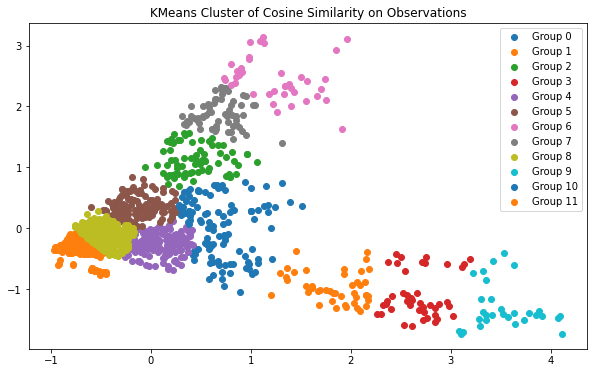

In [26]:
# Fit KMeans clustering algorithm
n_clus = 12

# Cluster analysis on cosine similarity dataset leveraging Principal Componenets
kmeans = KMeans(n_clusters=n_clus).fit(pcaDF)

# Plot results
fig = plt.figure()
fig.set_size_inches(10, 6)

for i in range(0,n_clus):
    plt.scatter(pcaDF.loc[kmeans.labels_ == i, 0], pcaDF.loc[kmeans.labels_ == i, 1], label='Group '+ str(i))

plt.legend()
plt.title("KMeans Cluster of Cosine Similarity on Observations")

## Post-Hoc Analysis

In [30]:
check1 = df[df['Bryce']==True]
check1['cluster'].value_counts()

1     101
8      85
4      41
5      26
10     15
7      10
0       8
2       7
6       5
11      3
Name: cluster, dtype: int64

In [31]:
# What cluster would you like to investigate?

group_number = 1

In [32]:
# Show Dataframe 

df['cluster'] = kmeans.labels_

check = df[df['cluster']==group_number]

index_position = check.index.values.astype(int)[0]

del check

df['similarity_score'] = simRes[index_position]

check = df[df['cluster']==group_number]

check.sort_values("similarity_score", inplace=True, ascending=False)

#  Show DataFrame
check

C:\Users\hlmq\AppData\Local\Temp\ipykernel_15344\3424556031.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check.sort_values("similarity_score", inplace=True, ascending=False)


,Caption,Alert_Type,Relevant,Bryce,caption_tokens,cluster,similarity_score
6,heavy shooting heard during clashes in san pab...,Urgent,Relevant,True,"[heavy, shooting, heard, during, clashes, in, ...",1,1.000000
700,two dead three injured due to explosions durin...,Urgent,Relevant,False,"[two, dead, three, injured, due, to, explosion...",1,0.204368
1408,explosions reported during possible public dis...,Urgent,Relevant,True,"[explosions, reported, during, possible, publi...",1,0.111522
1410,major flooding after heavy rainfall in helidon...,Urgent,Relevant,False,"[major, flooding, after, heavy, rainfall, in, ...",1,0.106929
1277,possible tear gas deployed and gunshots heard ...,Urgent,Relevant,False,"[possible, tear, gas, deployed, and, gunshots,...",1,0.094414
...,...,...,...,...,...,...,...
1160,buses transport demonstrators to leskovac serbia,Urgent,Relevant,False,"[buses, transport, demonstrators, to, leskovac...",1,0.000000
757,georgian government reportedly delays departur...,Urgent,Relevant,False,"[georgian, government, reportedly, delays, dep...",1,0.000000
1166,checkpoints being set up at entrance to lviv u...,Urgent,Relevant,False,"[checkpoints, being, set, up, at, entrance, to...",1,0.000000
756,taiwanese environmental alliance creates onlin...,Alert,Relevant,False,"[taiwanese, environmental, alliance, creates, ...",1,0.000000


In [34]:
check['Alert_Type'].value_counts()

Alert     224
Urgent    212
Name: Alert_Type, dtype: int64

In [35]:
check['Bryce'].value_counts()

False    335
True     101
Name: Bryce, dtype: int64

In [33]:
# LDA Modeling

#Create DTM
cv = CountVectorizer(ngram_range = (1,1))
dtm = cv.fit_transform(check['Caption'])
words = np.array(cv.get_feature_names())

#Parameters

number_topics = 3
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1, random_state=123)
lda.fit(dtm)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, cv, number_words)
#print_topics()

C:\Users\hlmq\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topics found via LDA:

Topic #0:
in to of says and ukraine oil after from russia

Topic #1:
in flight to kazakhstan over region area information mgrs activated

Topic #2:
to in of ukraine russian due and australia says with


In [ ]:
# Check what topic each document is most similar to
doc_topic_distrib = lda.transform(dtm)
doc_topic_distrib[-1]